<a href="https://colab.research.google.com/github/juyoung524/22-1-Spring-/blob/main/20220530%20pytorch_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [Pytorch Hub](https://pytorch.org/hub/research-models)

홈페이지- Generative

Progressive Growing: PGAN이라고 불림. Model description에 보면 High quality image generation of fashion, celebrity faces

Model 자체가 다양한 celebrity data를 가지고 만들어낸 것임. Celebrity 얼굴을 random하게 막 만들어냄. 계속 새롭게 만들어냄

Model 불러오기 (torch hub load) 불러오면 model이 받아지고, 그 모델 가지고 random noise했더니 image가 만들어짐

> image generation (e.g. [PGAN](https://pytorch.org/hub/facebookresearch_pytorch-gan-zoo_pgan/))

In [1]:
import torch
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'PGAN', model_name='celebAHQ-512', pretrained=True)

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/archive/hub.zip" to /root/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/celebaHQ16_december_s7_i96000-9c72988c.pth" to /root/.cache/torch/hub/checkpoints/celebaHQ16_december_s7_i96000-9c72988c.pth


  0%|          | 0.00/264M [00:00<?, ?B/s]

Average network found !


AI가 예술가의 활동 하는 것임. 그림도 그리고, 사진도 찍어내고...

PGAN이라고 적혀 있고, celebrity를 high quality로 불러오는 일을 하는 것임

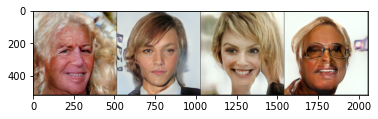

In [2]:
num_images = 4
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())

Image 4개

model.test(noise) 넣어주면 이미지가 만들어짐. 네 장의 사진 만들어짐

Noise 넣어주는 이유: random한 숫자들이 random한 얼굴을 만들어내는 것임. 그 noise를 위에서부터 4개 만들어주는 것임. 

한 번도 보지 못한 celebrity 얼굴을 만들어냄. 성능이 조금 떨어지지만, 제일 좋은 model 쓰면 못알아볼 정도로 정확하게 available함. 